<a href="https://colab.research.google.com/github/CodeWithSridhar/Movie_Netfiz_Hackathon/blob/main/hackathon_Building_a_Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
links_df = pd.read_csv('/content/drive/MyDrive/Hackathon - Building a Movie Recommendation System/links.csv')
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
movies_df = pd.read_csv('/content/drive/MyDrive/Hackathon - Building a Movie Recommendation System/movies.csv')
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings_df = pd.read_csv('/content/drive/MyDrive/Hackathon - Building a Movie Recommendation System/ratings.csv')
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
tags_df = pd.read_csv('/content/drive/MyDrive/Hackathon - Building a Movie Recommendation System/tags.csv')
tags_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [ ]:
ratings_df['movieId'].value_counts().idxmax()

356

In [ ]:
# prompt: which movie is having movieId-356

movies_df[movies_df['movieId']==356]


,movieId,title,genres
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War


In [ ]:
most_rated_movie_id = 356
most_rated_movie_title = movies_df.loc[movies_df['movieId'] == most_rated_movie_id, 'title'].iloc[0]
print(most_rated_movie_title)

Forrest Gump (1994)


In [ ]:

matrix_movie_id = movies_df[movies_df['title'].str.contains('Matrix, The \(1999\)', regex=True)]['movieId'].iloc[0]

matrix_tags = tags_df[tags_df['movieId'] == matrix_movie_id]['tag'].unique()
print(matrix_tags)

['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [ ]:
terminator_movie_id = movies_df[movies_df['title'].str.contains('Terminator 2: Judgment Day \(1991\)', regex=True)]['movieId'].iloc[0]

average_rating_terminator = ratings_df[ratings_df['movieId'] == terminator_movie_id]['rating'].mean()
print(average_rating_terminator)

3.970982142857143


How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

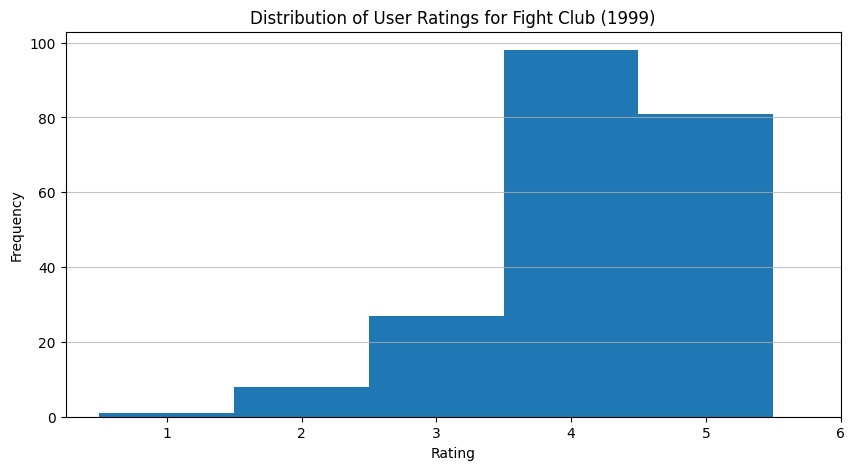

In [ ]:
import matplotlib.pyplot as plt
fight_club_movie_id = movies_df[movies_df['title'].str.contains('Fight Club \(1999\)', regex=True)]['movieId'].iloc[0]
fight_club_ratings = ratings_df[ratings_df['movieId'] == fight_club_movie_id]['rating']

plt.figure(figsize=(10, 5))
plt.hist(fight_club_ratings, bins=range(1, int(fight_club_ratings.max())+2), align='left')
plt.title('Distribution of User Ratings for Fight Club (1999)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(range(1, int(fight_club_ratings.max())+2))
plt.grid(axis='y', alpha=0.75)
plt.show()

The distribution of ratings is not uniform, as there are clear peaks and variations in frequency.
The distribution does not appear to be left-skewed; the tail is not longer on the left side.
The distribution seems to be right-skewed, with a longer tail on the right side, indicating that there are more high ratings.
It is not a perfect normal distribution, as it is not symmetrical around the mean.
Given the shape of the histogram, the most accurate description of the distribution of user ratings for "Fight Club (1999)" is a right-skewed distribution.

Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings.

In [ ]:
ratings_grouped = ratings_df.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()
print(ratings_grouped.head())

   movieId  count      mean
0        1    215  3.920930
1        2    110  3.431818
2        3     52  3.259615
3        4      7  2.357143
4        5     49  3.071429


The table above shows the movieId along with the count of ratings and the mean rating for each movie.
The first few rows indicate that, for example, the movie with movieId 1 has 215 ratings with an average rating of approximately 3.92.

1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings.
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

In [ ]:
ratings_grouped = ratings_df.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()
movies_with_ratings = movies_df.merge(ratings_grouped, on='movieId', how='inner')
movies_with_more_than_50_ratings = movies_with_ratings[movies_with_ratings['count'] > 50]
print(movies_with_more_than_50_ratings.head())

   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
5        6              Heat (1995)   
6        7           Sabrina (1995)   

                                        genres  count      mean  
0  Adventure|Animation|Children|Comedy|Fantasy    215  3.920930  
1                   Adventure|Children|Fantasy    110  3.431818  
2                               Comedy|Romance     52  3.259615  
5                        Action|Crime|Thriller    102  3.946078  
6                               Comedy|Romance     54  3.185185  


Which movie is the most popular based on  average user ratings?

In [ ]:

movies_with_significant_ratings = movies_with_ratings[movies_with_ratings['count'] > 50]

most_popular_movie = movies_with_significant_ratings.sort_values(by='mean', ascending=False).iloc[0]
print(most_popular_movie)

movieId                                 318
title      Shawshank Redemption, The (1994)
genres                          Crime|Drama
count                                   317
mean                               4.429022
Name: 277, dtype: object


Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [ ]:
top_5_popular_movies_by_count = movies_with_ratings.sort_values(by='count', ascending=False).head(5)
print(top_5_popular_movies_by_count[['title', 'count']])

                                 title  count
314                Forrest Gump (1994)    329
277   Shawshank Redemption, The (1994)    317
257                Pulp Fiction (1994)    307
510   Silence of the Lambs, The (1991)    279
1938                Matrix, The (1999)    278


In [ ]:

sci_fi_movies = movies_with_ratings[movies_with_ratings['genres'].str.contains('Sci-Fi')]


sci_fi_movies_sorted_by_count = sci_fi_movies.sort_values(by='count', ascending=False)

third_most_popular_sci_fi_movie = sci_fi_movies_sorted_by_count.iloc[2]
print(third_most_popular_sci_fi_movie[['title', 'count']])

title    Jurassic Park (1993)
count                     238
Name: 418, dtype: object


You already have a subset of data containing only those movies which has recieved more than 50 user ratings.
Using "links.csv", scrape the IMDB reviews of each movie with more than 50 user ratings. "README.md" file contains the required details.

In [ ]:
movies_with_links = movies_with_more_than_50_ratings.merge(links_df, on='movieId')
movies_with_links = movies_with_links[['movieId', 'title', 'imdbId']]

print(movies_with_links.head())

   movieId                    title  imdbId
0        1         Toy Story (1995)  114709
1        2           Jumanji (1995)  113497
2        3  Grumpier Old Men (1995)  113228
3        6              Heat (1995)  113277
4        7           Sabrina (1995)  114319


Mention the movieId of the movie which has the highest IMDB rating

In [ ]:
sci_fi_movies_df = movies_df[movies_df['genres'].str.contains('Sci-Fi')]
sci_fi_movies_df.head()

,movieId,title,genres
23,24,Powder (1995),Drama|Sci-Fi
28,29,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
59,66,Lawnmower Man 2: Beyond Cyberspace (1996),Action|Sci-Fi|Thriller
68,76,Screamers (1995),Action|Sci-Fi|Thriller


In [ ]:
sci_fi_links_df = links_df[links_df['movieId'].isin(sci_fi_movies_df['movieId'])]
sci_fi_links_df.head()

,movieId,imdbId,tmdbId
23,24,114168,12665.0
28,29,112682,902.0
31,32,114746,63.0
59,66,116839,11525.0
68,76,114367,9102.0


In [ ]:
from tqdm.auto import tqdm

tqdm.pandas()

average_ratings = ratings_df.groupby('movieId')['rating'].mean().reset_index()
sci_fi_with_ratings = sci_fi_movies_df.merge(average_ratings, on='movieId', how='inner')

highest_rated_sci_fi = sci_fi_with_ratings.loc[sci_fi_with_ratings['rating'].idxmax()]

highest_rated_sci_fi_movieId = highest_rated_sci_fi['movieId']
highest_rated_sci_fi_rating = highest_rated_sci_fi['rating']

print('The movieId of the highest-rated Sci-Fi movie is:', highest_rated_sci_fi_movieId)
print('With an average rating of:', highest_rated_sci_fi_rating)

The movieId of the highest-rated Sci-Fi movie is: 3687
With an average rating of: 5.0


Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.


In [ ]:
import pandas as pd
rated_movies_with_imdb = average_ratings.merge(links_df, on='movieId', how='inner')

highest_rated_movie = rated_movies_with_imdb.loc[rated_movies_with_imdb['rating'].idxmax()]
highest_rated_movie_id = highest_rated_movie['movieId']
highest_rated_movie_rating = highest_rated_movie['rating']

# Display the result
highest_rated_movie_id, highest_rated_movie_rating

(53.0, 5.0)